In [46]:
from typing import List

import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
import pickle
import datetime as dt
import matplotlib.dates as md
from matplotlib import ticker

from ext.jjnp21.automator.experiment import Result


def load_results(path) -> List[Result]:
    with open(path, 'rb') as f:
        results = pickle.load(f)
        return results

In [2]:
# importing of raw data
path = '/home/jp/Documents/tmp/lb_scaling_new'
dumps = [
    ('global_2000s_75rps.dump', 'global_high'),
    ('global_2000s_25rps.dump', 'global_low'),
    ('nation_2000s_75rps.dump', 'nation_high'),
    ('nation_2000s_25rps.dump', 'nation_low')
]
results = {}
for filename, key in dumps:
    results[key] = load_results(f'{path}/{filename}')

In [24]:
results['global_high'][0].invocations.head()
results['global_high'][0].invocations.iloc[0].name

Timestamp('2021-12-14 17:40:09.583297')

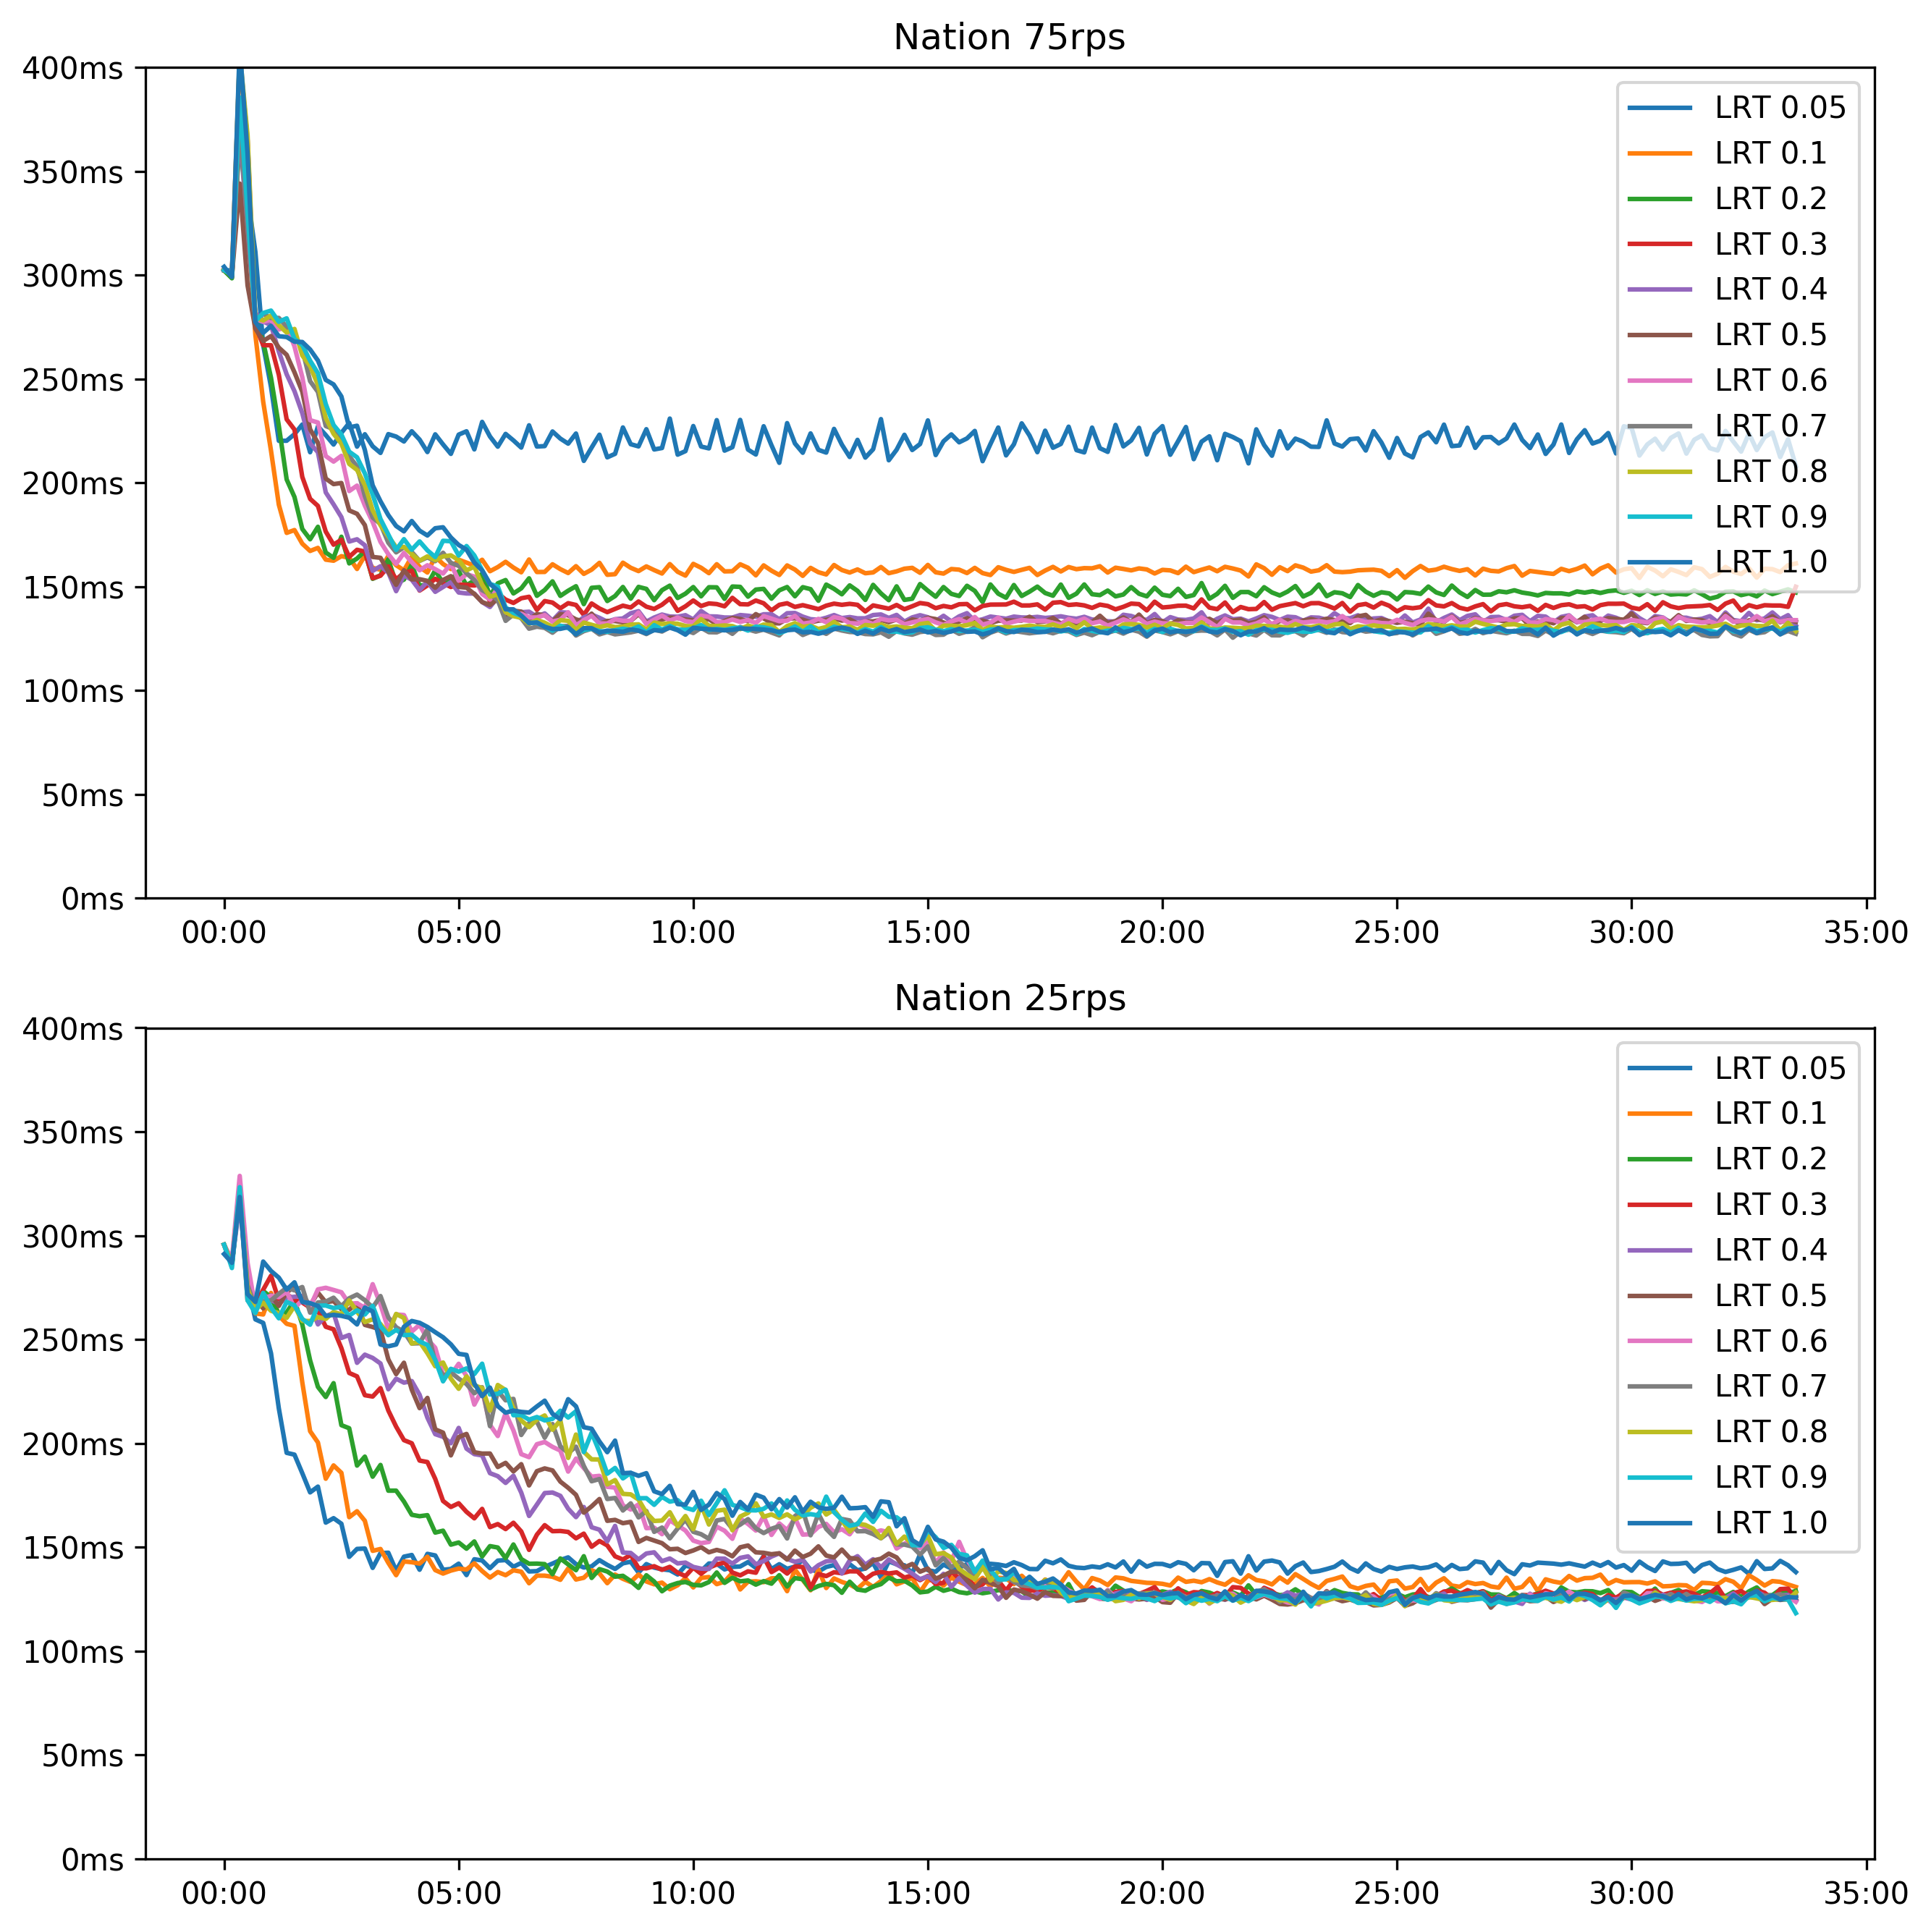

In [61]:
def plot_convergence(ax, results: List[Result], title):
    ax.set_title(title)
    beginnings = []
    results = sorted(results, key=lambda r: r.experiment.name)
    for r in results:
        beginnings.append(r.invocations.iloc[0].name)
    timebase = min(beginnings)
    timebase = dt.datetime(1970,1,1)
    
    xfmt = md.DateFormatter('%M:%S')
    ax.xaxis.set_major_formatter(xfmt)

    for r in results:
        delta = r.invocations.iloc[0].name - timebase
        ax.plot(r.invocations.shift(freq=-delta)['t_exec'].resample('10s').mean(), label=r.experiment.name)
    ax.legend(loc='upper right')
    ax.set_ylim((0, 0.4))
    @ticker.FuncFormatter
    def ms_formatter(x, pos):
        return f'{str(int(x * 1000))}ms'
    ax.yaxis.set_major_formatter(ms_formatter)
    

# fig, axs = plt.subplots(2, 1, figsize=(9,9), dpi=300)

# plot_convergence(axs[0], results['global_high'], 'Global 75rps')
# plot_convergence(axs[1], results['global_low'], 'Global 25rps')
# fig.tight_layout()
fig, axs = plt.subplots(2, 1, figsize=(9,9), dpi=300)
plot_convergence(axs[0], results['nation_high'], 'Nation 75rps')
plot_convergence(axs[1], results['nation_low'], 'Nation 25rps')
fig.tight_layout()

In [83]:
results['global_high'][0].invocations.tail()

def filter_after_seconds(inv, threshold):
    return inv[inv['t_start'] >= threshold]

for exper, res in results.items():
    print(exper)
    rss = sorted(res, key=lambda r: r.experiment.name)
    for r in rss:
        filtered = filter_after_seconds(r.invocations, 1200)
        valf = float(filtered['t_exec'].mean())
        val = int(round(valf * 1000))
        print(str(val) + 'ms')

# filter_after_seconds(results['global_high'][9].invocations, 1200)['t_exec'].mean()

global_high
210ms
149ms
134ms
132ms
130ms
128ms
129ms
129ms
128ms
129ms
127ms
global_low
132ms
128ms
127ms
124ms
126ms
125ms
126ms
125ms
128ms
125ms
125ms
nation_high
220ms
158ms
147ms
141ms
135ms
134ms
133ms
128ms
131ms
129ms
129ms
nation_low
141ms
133ms
128ms
127ms
126ms
125ms
126ms
126ms
125ms
125ms
126ms


In [87]:
for exper, res in results.items():
    print(exper)
    rss = sorted(res, key=lambda r: r.experiment.name)
    for r in rss:
        filtered = filter_after_seconds(r.invocations, 1200)
        val = len(r.invocations['lb_node'].unique())
        print(r.experiment.name + ': ' + str(val))


global_high
LRT 0.05: 14
LRT 0.1: 24
LRT 0.2: 46
LRT 0.3: 63
LRT 0.4: 76
LRT 0.5: 90
LRT 0.6: 94
LRT 0.7: 105
LRT 0.8: 98
LRT 0.9: 108
LRT 1.0: 113
global_low
LRT 0.05: 13
LRT 0.1: 25
LRT 0.2: 47
LRT 0.3: 62
LRT 0.4: 77
LRT 0.5: 87
LRT 0.6: 96
LRT 0.7: 100
LRT 0.8: 111
LRT 0.9: 124
LRT 1.0: 113
nation_high
LRT 0.05: 14
LRT 0.1: 24
LRT 0.2: 45
LRT 0.3: 63
LRT 0.4: 77
LRT 0.5: 83
LRT 0.6: 92
LRT 0.7: 103
LRT 0.8: 108
LRT 0.9: 107
LRT 1.0: 117
nation_low
LRT 0.05: 13
LRT 0.1: 26
LRT 0.2: 47
LRT 0.3: 64
LRT 0.4: 77
LRT 0.5: 86
LRT 0.6: 98
LRT 0.7: 102
LRT 0.8: 109
LRT 0.9: 113
LRT 1.0: 117


In [86]:
len(results['global_high'][0].invocations['lb_node'].unique())

46